In [1]:
import pymysql as db
import pprint
from emoji import core
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Hannanum, Okt
import nltk

local = 'team0402.c43ypw0liaa2.ap-northeast-2.rds.amazonaws.com'  # aws rds 접근
con = db.connect(
    host=local,
    user='team0402',
    db='Team0402_Youtube',
    password='team0402',
    charset='utf8mb4'
)
cur = con.cursor()

def get_result_byQuery(query):
    cur.execute(query)
    return cur.fetchall()

def get_wordCloud(tuples):
    """
    Make WordCloud
    여러개의 문자열로 이루어진 튜플을 인자로 받는다.
    만들어진 img를 리턴한다.
    """
    # 하나의 문자열로 만들어주는 작업 / 튜플안에서 튜플꺼내기
    longStr = ''.join([text for tuple in tuples for text in tuple])

    #이모지 제거
    longStr_NoEmoji = core.replace_emoji(longStr, replace="")

    # 형태소 분석 및 카운터
    hannanum = Hannanum()
    titleNouns = hannanum.nouns(longStr_NoEmoji)
    titleCounter = Counter(titleNouns)

    wordcloud = WordCloud(
        font_path ="./malgun.ttf",
        width=1000,
        height=400,
        max_words=100,
        prefer_horizontal=1,
        max_font_size=200,
    )

    img = wordcloud.generate_from_frequencies(titleCounter)
    return img

In [3]:
query_result = get_result_byQuery(
    """
    SELECT cmt.content
    FROM TB_VIDEO_INFO as v
    INNER JOIN TB_COMMENT_INFO as cmt ON v.video_id = cmt.video_id
    WHERE v.channel_id = 'UCbzI92w5vWa6mEj1dACfy6g'
    ORDER BY v.view_count desc LIMIT 500;
    """
)
pprint.pprint(query_result)

(('Hello, Fume! Im from Indonesia. Id love to see you eat especially when you '
  'eat jjajjangmyeon. It so mouthwatering 🤤🤤 unfortunately its very hard to '
  'find "the real" jjajjangmyeon in Indonesia but Thank God there is many '
  'Korean restaurant here which had jjajjangmyeon as their menu😂😂\n'
  '\n'
  'Anyway, can I suggest you to eat Indonesian food? Especially rendang? '
  'Rendang is very delicious, you should try it! Anyway have a good night '
  'everyone!! 😊😊',),
 ('SPICY CHILI KIMCHI BLACK BEAN NOODLES FRIED EGG never fail to make my belly '
  'growling my mouth watering and myself craving',),
 ('You are by far the Empress of Spice! I’ve never seen anyone take it so '
  'calmly like they’re eating ice cream LOL! 😃',),
 ('NÃO CANSO DE VER ESSAS COMIDAS COREANAS !!! PARECEM TÃO BONS 😍😍😋😋🤤🤤 !!! '
  'ADOREI O VÍDEO 👏🏻 !!! GOSTAMOS MUITO DE VER E FAZER ASMR TAMBÉM ❤️!!!!!',),
 ('Looks so delicious 😋🔥\nand spicy 🌶️ \nLove you Fume❤️\nhave a nice day!👋🏽',),
 ('Ive been so exite

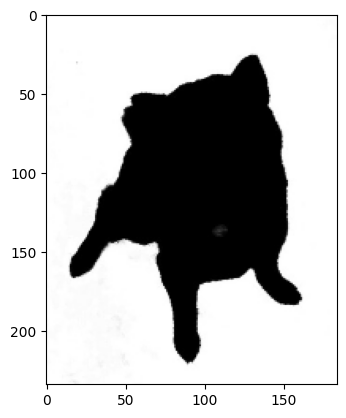

In [7]:
from PIL import Image
icon = Image.open('./dog.PNG')
plt.imshow(icon)